In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
#generate the sample
def gen_data():
    nobs = 1000
    beta = 3
    x = np.random.uniform(low=-3., high=3., size=(nobs,3))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1*(1 + beta * x[:,1] + e >= 0) 
    return y,x,nobs

yn,xn,nobs = gen_data()

print(xn[:,1][1], xn[:,1:3][1])

-1.042638223112004 [-1.04263822  1.74521962]


In [3]:
def compute_llr(yn,xn): 
    x1n,x2n = xn[:,0:2],xn[:,1:3]
    model1 = sm.Probit(yn,sm.add_constant(x1n))
    model1_fit = model1.fit(disp=False)
    ll1 = model1.loglikeobs(model1_fit.params)
    
    model2 = sm.Probit(yn,sm.add_constant(x2n))
    model2_fit = model2.fit(disp=False)
    ll2 = model2.loglikeobs(model2_fit.params)
    
    llr = ll1.sum() - ll2.sum()
    omega2 = (ll1- ll2).var()
    return llr,np.sqrt(omega2)

yn,xn,nobs = gen_data()

z1,z2 = np.random.uniform(low=-3., high=3., size=(2,nobs))
print(compute_llr(yn,xn))

(0.02568376944434192, 0.04893930710897728)


False
False


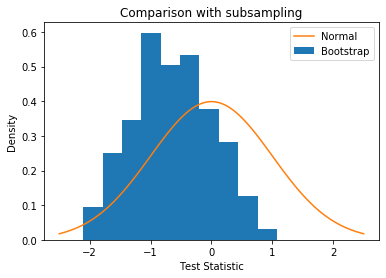

In [4]:
def regular_test(yn,xn,nobs,hist=False):
    llr, omega = compute_llr(yn,xn)
    test_stat = llr/(omega*np.sqrt(nobs))
    #plot
    if hist:
        x = np.linspace(-2.5, 2.5, 100)
        plt.plot(x, stats.norm.pdf(x, 0, 1),label="Normal")
    return np.abs(test_stat) >= 1.96


def bootstrap_test(yn,xn,nobs,hist=False):
    test_stats = []
    trials = 100
    for i in range(trials):
        subn = 1000
        np.random.seed()
        sample  = np.random.choice(np.arange(0,nobs),subn,replace=True)
        ys,xs = yn[sample],xn[sample]
        llr, omega = compute_llr(ys,xs)
        test_stat = llr/(omega*np.sqrt(subn))
        test_stats.append(test_stat)
    #plot
    if hist:
        plt.hist(test_stats, density=True,bins=10, label="Bootstrap")
    
    cv_upper = np.percentile(test_stats, 97.5, axis=0)
    cv_lower = np.percentile(test_stats, 2.5, axis=0)
    llr, omega = compute_llr(yn,xn)
    test_stat = llr/(omega*np.sqrt(nobs))
    return 0 >= cv_upper or 0 <= cv_lower
    

yn,xn,nobs = gen_data()
print(bootstrap_test(yn,xn,nobs,hist=True))
print(regular_test(yn,xn,nobs,hist=True))

plt.title("Comparison with subsampling")
plt.xlabel("Test Statistic")
plt.ylabel("Density")
plt.legend()
plt.savefig('figs/bootstrap_compare_1')
plt.show()

In [5]:
reg = 0
boot = 0 
total = 100
for i in range(total):
    np.random.seed()
    yn,xn,nobs = gen_data()
    reg = regular_test(yn,xn,nobs) +reg
    boot = bootstrap_test(yn,xn,nobs) +boot

print("reg: %s, boot: %s"%(reg/total,boot/total))

reg: 0.0, boot: 0.0


In [6]:
#reg: 0.337, boot: 0.049
#reg: 0.0, boot: 0.0